# Illusatration of the Morh Circle for a genric stress state
Author : Emile.roux@univ-smb.fr

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
import sympy  as sp
from math import *
from sympy.plotting import plot_parametric
%matplotlib nbagg
sp.init_printing()

In [3]:
S11, S12, S13, S22, S23, S33 = sp.symbols("S11 S12 S13 S22 S23 S33")
n1,n2,n3 =  sp.symbols("n1 n2 n3")

In [4]:
# fullfill the tensor
Sigma=sp.Matrix([[S11,S12,S13],[S12,S22, S23],[S13,S23,S33]])
Sigma

⎡S₁₁  S₁₂  S₁₃⎤
⎢             ⎥
⎢S₁₂  S₂₂  S₂₃⎥
⎢             ⎥
⎣S₁₃  S₂₃  S₃₃⎦

In [5]:
n=sp.Matrix([n1,n2 ,n3])
n

⎡n₁⎤
⎢  ⎥
⎢n₂⎥
⎢  ⎥
⎣n₃⎦

# Function which projet $\vec{\phi}$ into the $(\vec{n}, \vec{t})$ space
$$ \newcommand{\norme}[1]{\left\Vert #1\right\Vert} $$
For a given stress state the stress flux is given by :
$$ \vec{\phi_n} = \sigma . \vec{n} $$

The normal stress component $\sigma_{nn}$ is obtain by projetcion of $\vec{\phi_n}$ on the normal
$$\sigma_{nn} = \vec{\phi_n} . \vec{n} $$

Then the shear stress compoant is computed using the fact that $\vec{\phi_n} = \sigma_{nn} \vec{n} + \sigma_{nt} \vec{t}$
$$\sigma_{nt} = \norme{\vec{\phi_n}  - \sigma_{nn} \vec{n}} $$


In [6]:
def proj(Sigma,n):
    n=n/n.norm()
    phi = Sigma * n
    Snn = phi.T * n
    Snt=(phi-n*Snn).norm()
    Snn=Snn[0]
    return Snn,Snt

# Setting for graph display

<IPython.core.display.Javascript object>


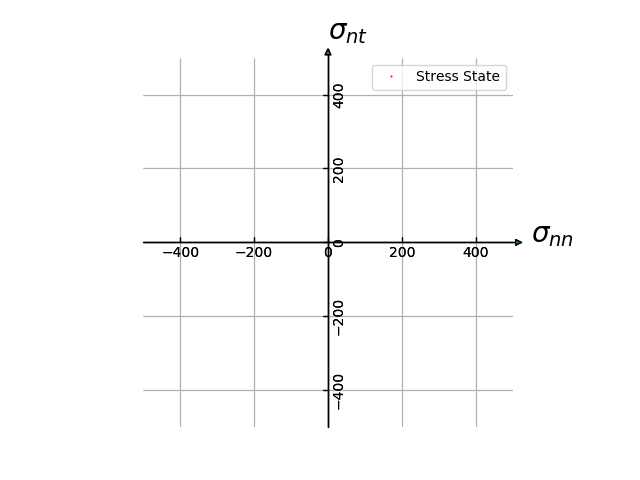

In [24]:
fig = plt.figure(1)
Sig_max=500.0
# Espace x,y
# Espace Snn,Snt
ax2 = SubplotZero(fig, 111)
fig.add_subplot(ax2)
#
for direction in ["xzero", "yzero"]:
    ax2.axis[direction].set_axisline_style("-|>")
    ax2.axis[direction].set_visible(True)
#
for direction in ["left", "right", "bottom", "top"]:
    ax2.axis[direction].set_visible(False)
    
ax2.set_aspect('equal')

ax2.set_xlim(-Sig_max, Sig_max)
ax2.set_ylim(-Sig_max, Sig_max)
ax2.text(0., 1.05, '$\sigma_{nt}$',size=20, transform=BlendedGenericTransform(ax2.transData, ax2.transAxes))
ax2.text(1.05, -0.15, '$\sigma_{nn}$',size=20, transform=BlendedGenericTransform(ax2.transAxes, ax2.transData))
ax2.grid()
mohr_circle, = ax2.plot([], [], '.r',label='Stress State', markersize=1)
ax2.legend()


# Projection of the Stress state into the $(\vec{n}, \vec{t})$ space

## 1 - Definition of the Stress tensor 

In [18]:
# Normal componants
_S11=200
_S22=-300
_S33=0.
#Shear Componants
_S12=30
_S13=-20
_S23=40
Sigma=sp.Matrix([[_S11,_S12,_S13],[_S12,_S22, _S23],[_S13,_S23,_S33]])
Sigma

⎡200   30   -20⎤
⎢              ⎥
⎢30   -300  40 ⎥
⎢              ⎥
⎣-20   40   0.0⎦

## 2 - For a single normal $\vec{n}$

### Definition of $\vec{n}$ :

In [27]:
_n1=1
_n2=0
_n3=0
n=sp.Matrix([_n1,_n2 ,_n3])
n

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Computation of $\sigma_{nn}$ and $\sigma_{nt}$

In [28]:
n=sp.Matrix([n1,n2 ,n3])
a=sp.symbols('alpha')
n=n.subs({n1:sp.cos(a),n2:-sp.sin(a)})
Snn,Snt=proj(Sigma,n)


In [21]:
n

⎡cos(α) ⎤
⎢       ⎥
⎢-sin(α)⎥
⎢       ⎥
⎣  n₃   ⎦

<IPython.core.display.Javascript object>


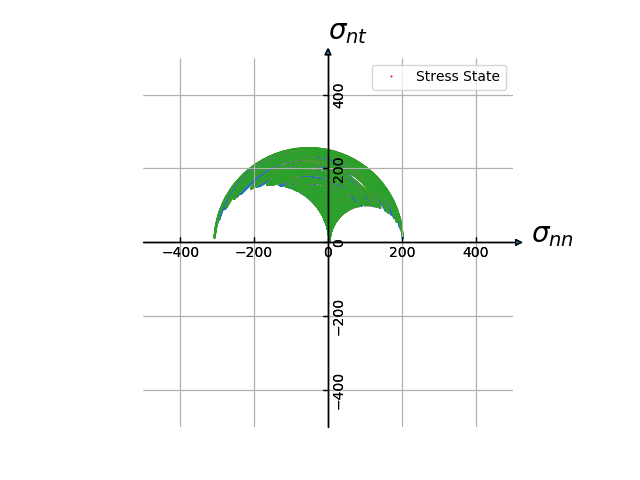

In [29]:

Snn_np=sp.lambdify((a,n3), Snn, 'numpy')
Snt_np=sp.lambdify((a,n3), Snt, 'numpy')
nb=4000.
a_=np.arange(0,100*np.pi,(100*np.pi/nb))
n3_=np.arange(-10,10,20./nb)


ax2.plot(Snn_np(a_,n3_),Snt_np(a_,n3_))
fig

In [32]:
Under work

SyntaxError: invalid syntax (<ipython-input-32-e18e41ec4710>, line 1)

In [31]:
# call the previous difined function
Snn,Snt=proj(Sigma,n)
Snn,Snt

# display on graph
x,y=mohr_circle.get_data()
mohr_circle.set_data(np.append(x,[Snn]), np.append(y,[Snt]))
ax2.quiver(0, 0, Snn, Snt, width=10,scale=1,units='x',label=r'$\phi_n$',color='b')
fig

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


## Test random orientations of the normal $\vec{n}$

In [ ]:
for i in range(1000):
  n=np.random.rand(3)-.5 # randmoly generate a normal
  Snn,Snt,phi = Snn_Snt_decomposition (Sigma, n)
  # display on graph
  x,y=mohr_circle.get_data()
  mohr_circle.set_data(np.append(x,[Snn, Snn]), np.append(y,[Snt, -Snt]))
    
fig

# Eigen Stresses computation

In [ ]:
VP=np.linalg.eigvals(Sigma)

# display on graph
ax2.plot(VP,[0, 0, 0],'og',label='Eigen Stresses')
ax2.legend()
fig

# Plot the 3 mohr circles konwing the eigen stresses

In [ ]:
# 1st
Radius=(VP[1]-VP[0])/2.
ax2.add_patch(
    patches.Circle(
        (VP[0]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
    )
)
# 2nd
ax2.plot(VP,[0, 0, 0],'og')
Radius=(VP[2]-VP[1])/2.
ax2.add_patch(
    patches.Circle(
        (VP[1]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
    )
)
# 3rd
ax2.plot(VP,[0, 0, 0],'og')
Radius=(VP[2]-VP[0])/2.
ax2.add_patch(
    patches.Circle(
        (VP[0]+Radius,0.),   # (x,y)
        Radius,          # radius
        linewidth=4,
        fill=False,
        label='Mohr Circles'
    )
)
ax2.legend()
fig